### Explore Time Series Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare

In [2]:
#Get the data
energy = acquire.get_german_power_data()

In [3]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


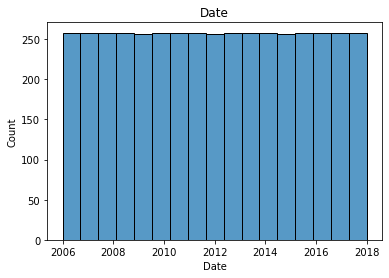

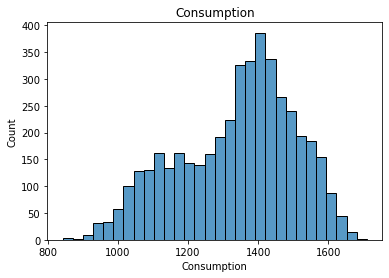

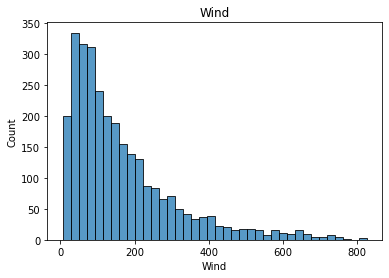

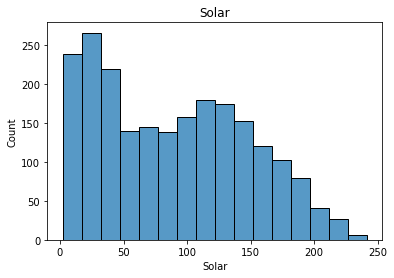

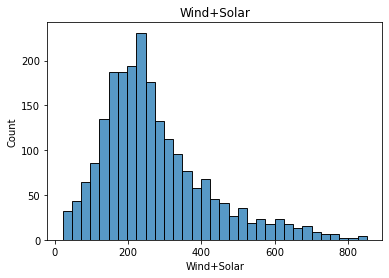

In [4]:
#Prepare the dataset
energy = prepare.prepare_energy_data(energy)

In [5]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


In [6]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


<AxesSubplot:xlabel='Date'>

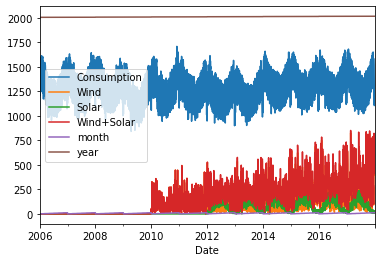

In [7]:
energy.plot()

In [8]:
energy.index.min()

Timestamp('2006-01-01 00:00:00')

In [9]:
energy.index.max()

Timestamp('2017-12-31 00:00:00')

I will split the data into train and test sets using the years. The train set will be composed of everything up to the year 2016. Test will be consist of the data from the years 2016 and 2017. 

Should train start at 2010 when the other methods of power generation began? Idk.

In [10]:
train = energy[:'2015']

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3652 entries, 2006-01-01 to 2015-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  3652 non-null   float64
 1   Wind         3652 non-null   float64
 2   Solar        3652 non-null   float64
 3   Wind+Solar   3652 non-null   float64
 4   month        3652 non-null   int64  
 5   year         3652 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 199.7 KB


In [12]:
test = energy['2016':]

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2016-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  731 non-null    float64
 1   Wind         731 non-null    float64
 2   Solar        731 non-null    float64
 3   Wind+Solar   731 non-null    float64
 4   month        731 non-null    int64  
 5   year         731 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 40.0 KB


### Begin exploring

In [20]:
#Add some plotting defaults
plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

Is consumption cyclic?

<AxesSubplot:xlabel='Date'>

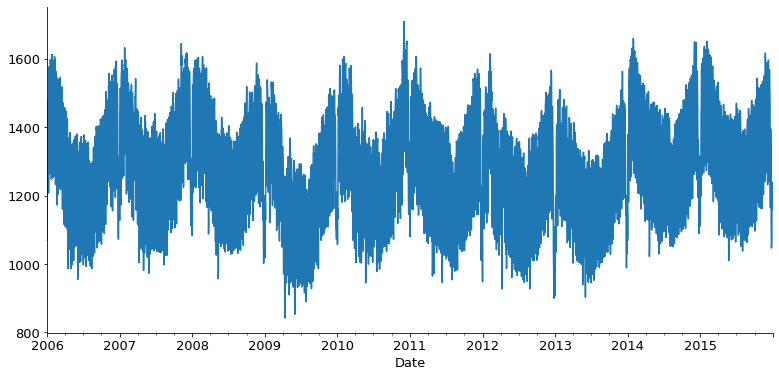

In [21]:
#Begin by plotting consumption
train.Consumption.plot()

<AxesSubplot:xlabel='Date'>

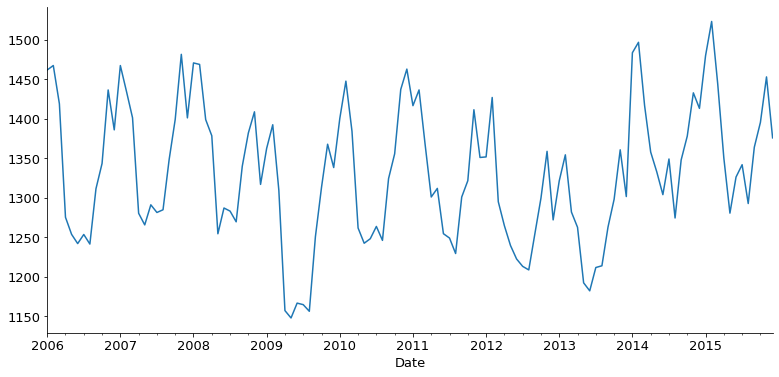

In [22]:
#Appears cyclic, but let's smooth it out a bit. Check monthly consumption averages
train.resample('M').mean().Consumption.plot()

<AxesSubplot:xlabel='Date'>

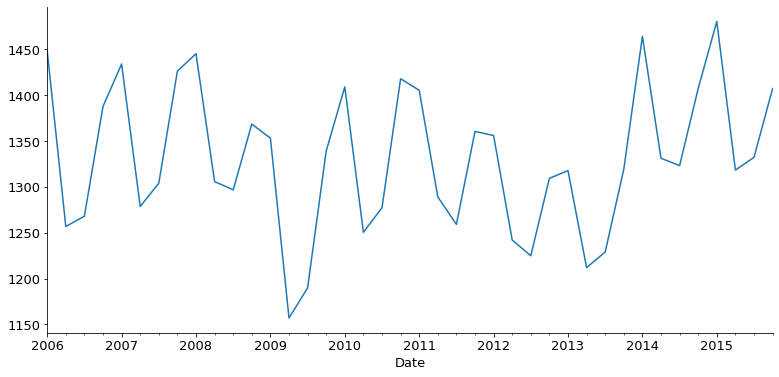

In [24]:
train.resample("Q").mean().Consumption.plot()

Definitely appears to have a cycle. Greater consumption in the colder months with much less in the summer months.

Does consumption have any kind of long term trend? I expect it to be increasing over time.

In [26]:
import statsmodels.api as sm

In [31]:
y = train.Consumption.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-31,1461.442065,NaN,89.281365,NaN
2006-02-28,1467.106893,NaN,113.896299,NaN
2006-03-31,1418.649161,NaN,37.569597,NaN
2006-04-30,1275.058900,NaN,-38.915070,NaN
2006-05-31,1253.488484,NaN,-77.751511,NaN


<AxesSubplot:xlabel='Date'>

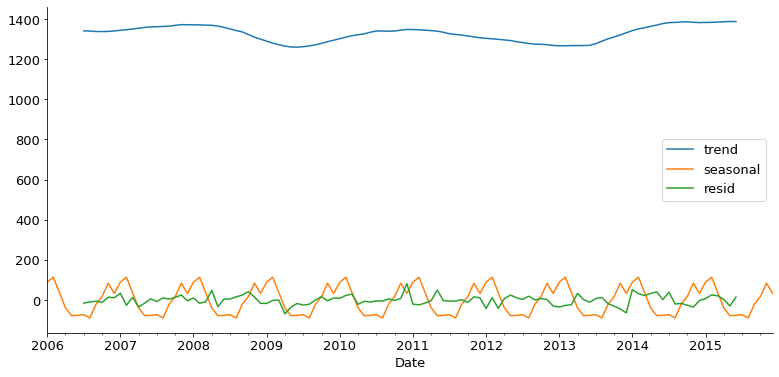

In [32]:
decomposition.iloc[:, 1:].plot()

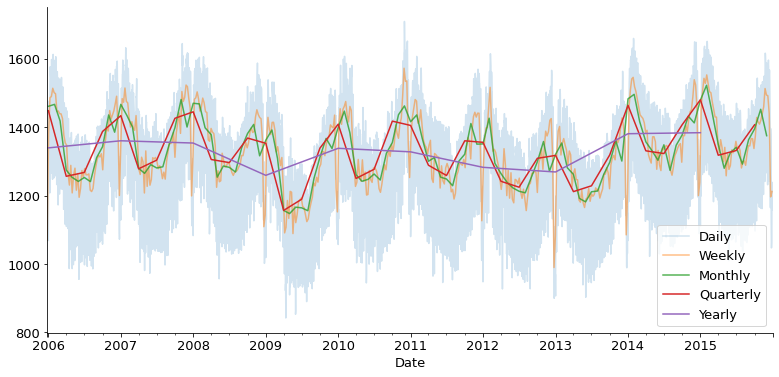

In [41]:
#Move on to wind power generation
train.Consumption.plot(label = 'Daily', alpha = 0.2)
train.Consumption.resample('W').mean().plot(label = 'Weekly', alpha = 0.5)
train.Consumption.resample('M').mean().plot(label = 'Monthly', alpha = 0.8)
train.Consumption.resample('Q').mean().plot(label = 'Quarterly')
train.Consumption.resample('Y').mean().plot(label = 'Yearly')
plt.legend()
plt.show()

Hard to tell for sure, but, despite the variance over time, I think it remains relatively constant.

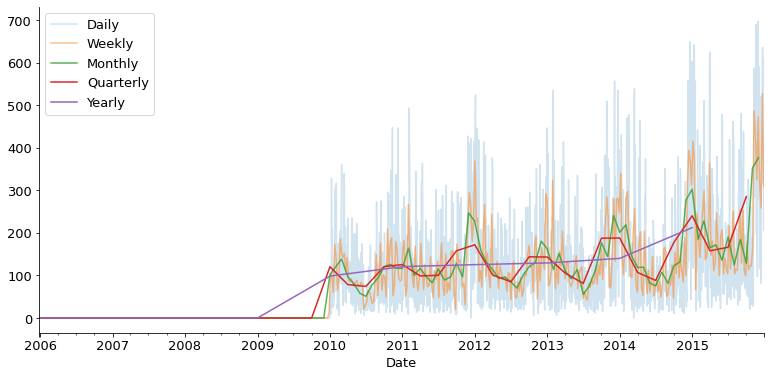

In [38]:
#Move on to wind power generation
train.Wind.plot(label = 'Daily', alpha = 0.2)
train.Wind.resample('W').mean().plot(label = 'Weekly', alpha = 0.5)
train.Wind.resample('M').mean().plot(label = 'Monthly', alpha = 0.8)
train.Wind.resample('Q').mean().plot(label = 'Quarterly')
train.Wind.resample('Y').mean().plot(label = 'Yearly')
plt.legend()
plt.show()

Definitely seems to have a positive trend over the years. Looking at the quarterly plot, we can also see that wind power production has a cycle that picks up in the windier, fall months and then drops back down for the rest of the year.

<AxesSubplot:xlabel='Date'>

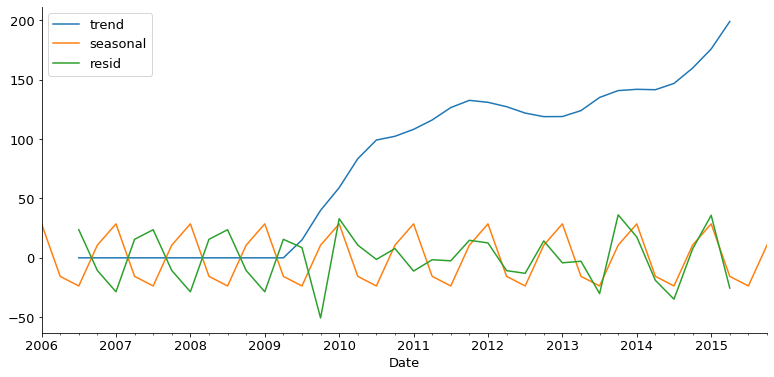

In [40]:
y = train.Wind.resample('Q').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.iloc[:, 1:].plot()

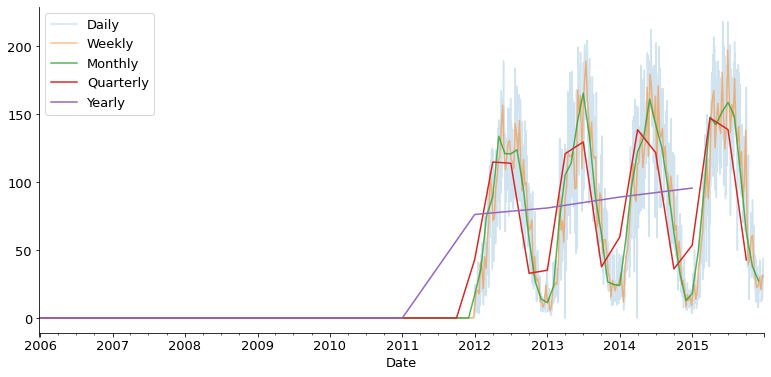

In [42]:
#Check Solar Power generation
#Move on to wind power generation
train.Solar.plot(label = 'Daily', alpha = 0.2)
train.Solar.resample('W').mean().plot(label = 'Weekly', alpha = 0.5)
train.Solar.resample('M').mean().plot(label = 'Monthly', alpha = 0.8)
train.Solar.resample('Q').mean().plot(label = 'Quarterly')
train.Solar.resample('Y').mean().plot(label = 'Yearly')
plt.legend()
plt.show()

Huge differences in solar production from season to season. Picks up in the summer months but drops off drastically in the winter months. On the whole, solar power production appears to be increasing.

<AxesSubplot:xlabel='Date'>

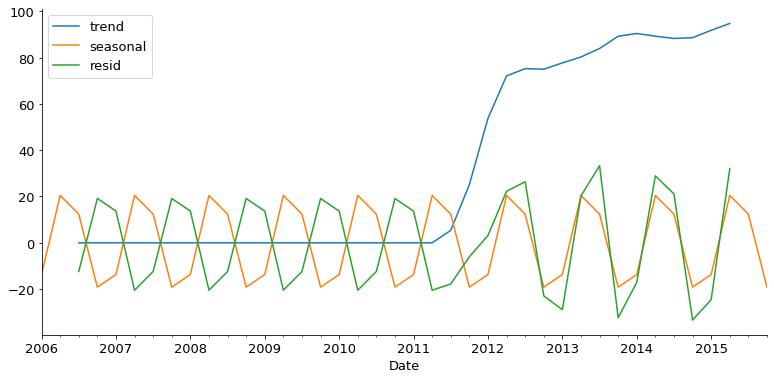

In [43]:
y = train.Solar.resample('Q').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.iloc[:, 1:].plot()

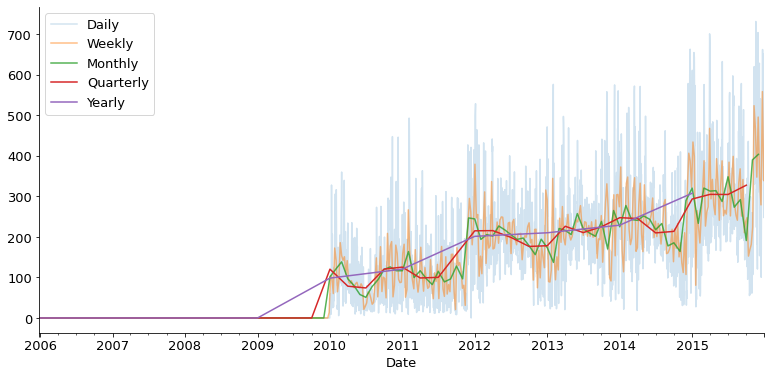

In [45]:
#Now check wind and solar power production combined
#Check Solar Power generation
#Move on to wind power generation
train['Wind+Solar'].plot(label = 'Daily', alpha = 0.2)
train['Wind+Solar'].resample('W').mean().plot(label = 'Weekly', alpha = 0.5)
train['Wind+Solar'].resample('M').mean().plot(label = 'Monthly', alpha = 0.8)
train['Wind+Solar'].resample('Q').mean().plot(label = 'Quarterly')
train['Wind+Solar'].resample('Y').mean().plot(label = 'Yearly')
plt.legend()
plt.show()

Definitely increasing from year to year. Looking at the quarterly and monthy cycles, it appears to dip in the summer months. Does this mean that solar power can't quite compete with Wind? Let's graph them together and see if there is a dramatic difference in their productions. 

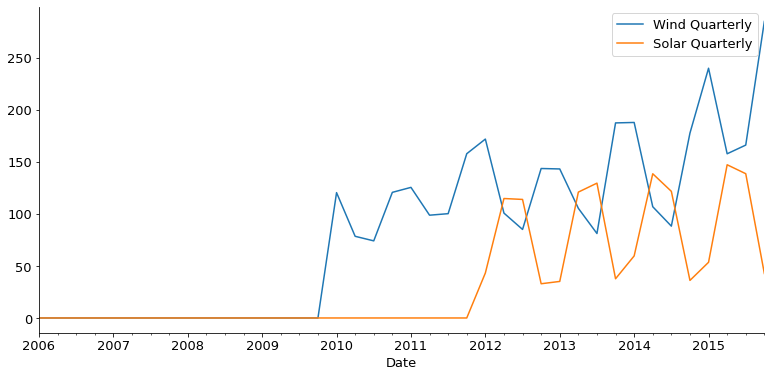

In [50]:
train.Wind.resample('Q').mean().plot(label = 'Wind Quarterly')
train.Solar.resample('Q').mean().plot(label = 'Solar Quarterly')
plt.legend()
plt.show()

It's easy to see here that the Solar production can't make up for the drop in wind production during the summer months. This explains the cyclic behavior we saw in the previous graph.

<AxesSubplot:title={'center':'Consumption Seasonal Plot'}, xlabel='Date'>

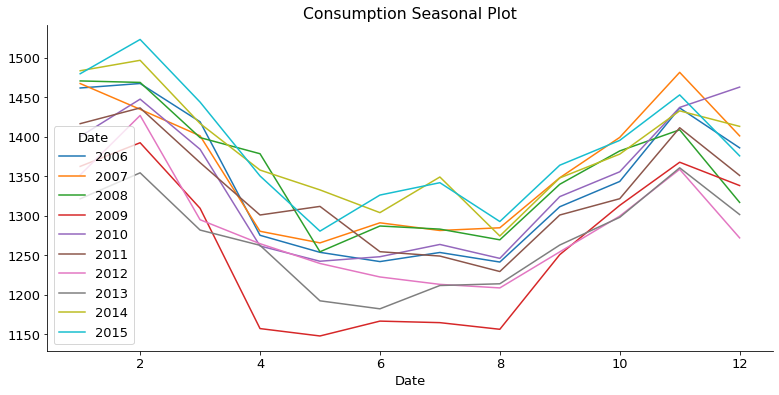

In [56]:
#Compare the yearly plots of each group
y = train.Consumption
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Consumption Seasonal Plot')

Looks like Consumption has increased over the last few years.

<AxesSubplot:title={'center':'Wind Seasonal Plot'}, xlabel='Date'>

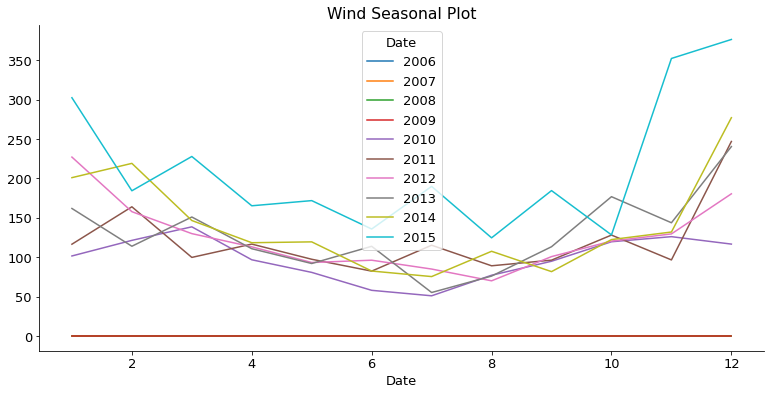

In [57]:
y = train.Wind
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Wind Seasonal Plot')

Looks fairly constant until 2015 when it makes a big jump.

<AxesSubplot:title={'center':'Solar Seasonal Plot'}, xlabel='Date'>

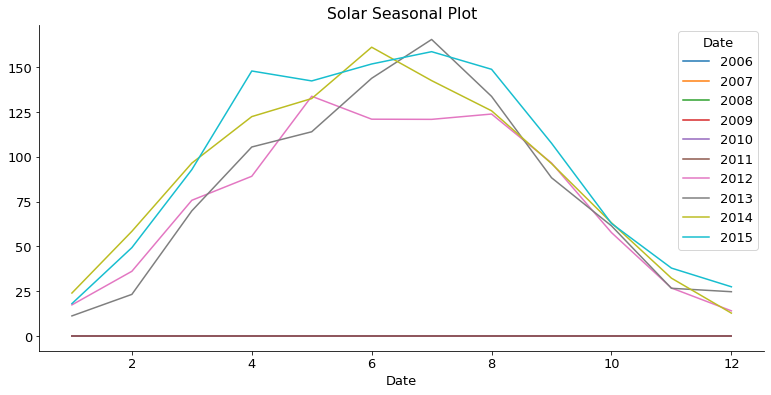

In [58]:
y = train.Solar
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Solar Seasonal Plot')

Definitely appears to be increasing over the last several years.

<AxesSubplot:title={'center':'Wind+Solar Seasonal Plot'}, xlabel='Date'>

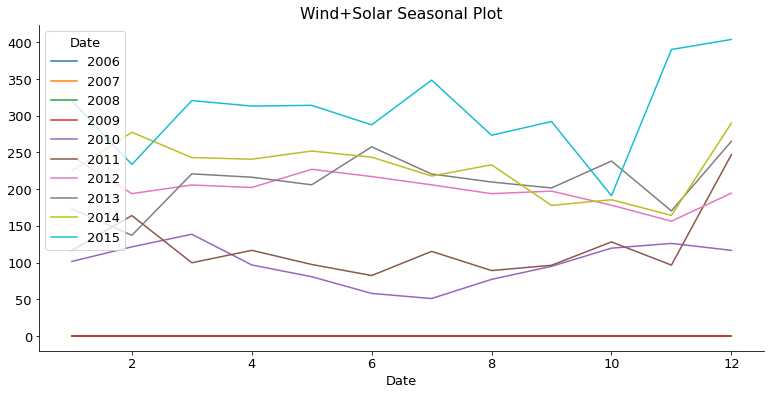

In [59]:
y = train['Wind+Solar']
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Wind+Solar Seasonal Plot')

Definitely increasing from year to year since 2010.

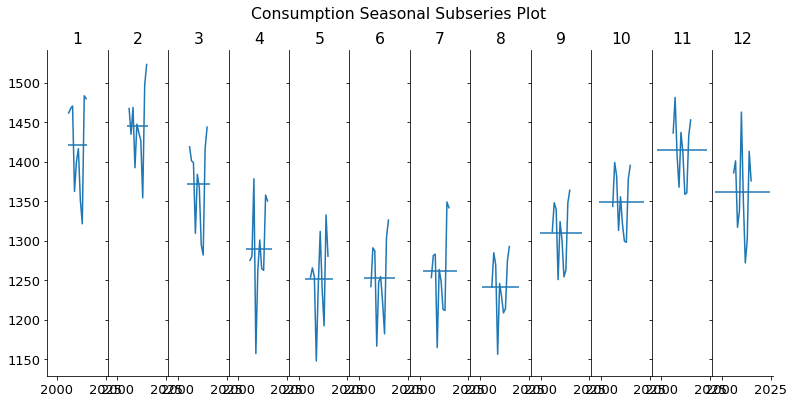

In [63]:
#Now try doing seasonal subseries plots
y = train.Consumption
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Consumption Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

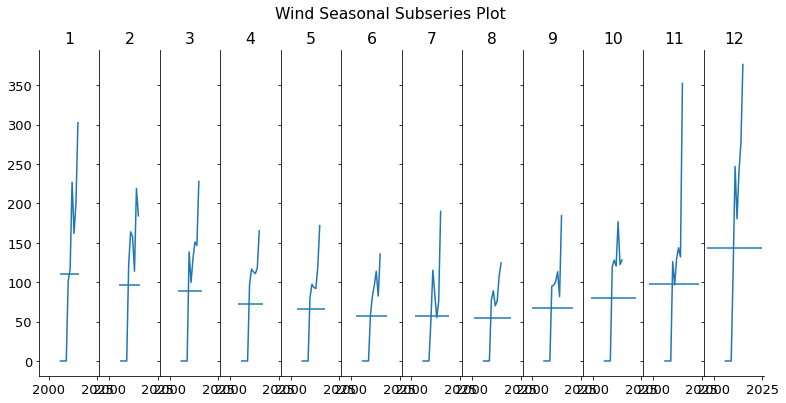

In [62]:
y = train.Wind
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Wind Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

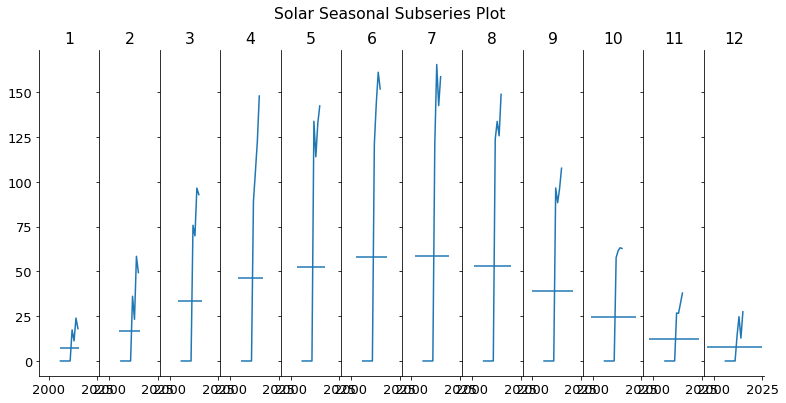

In [64]:
y = train.Solar
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Solar Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

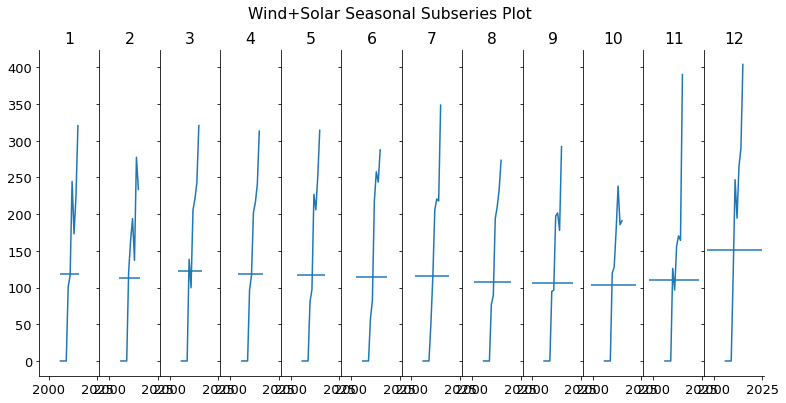

In [65]:
y = train['Wind+Solar']
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Wind+Solar Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

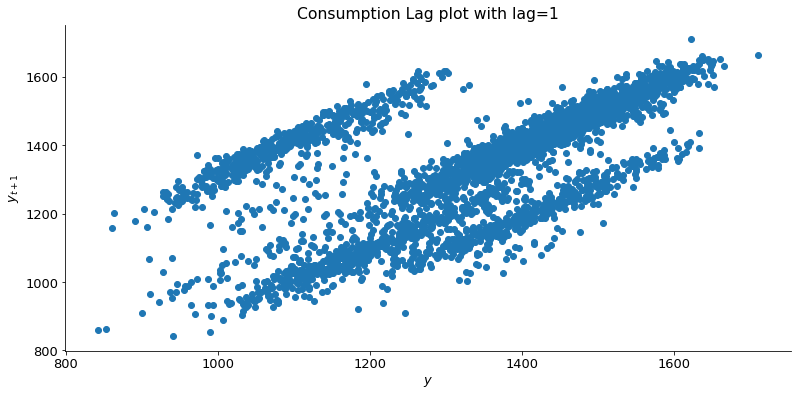

In [67]:
#Now try lag plots
y = train.Consumption
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Consumption Lag plot with lag=1')
plt.show()

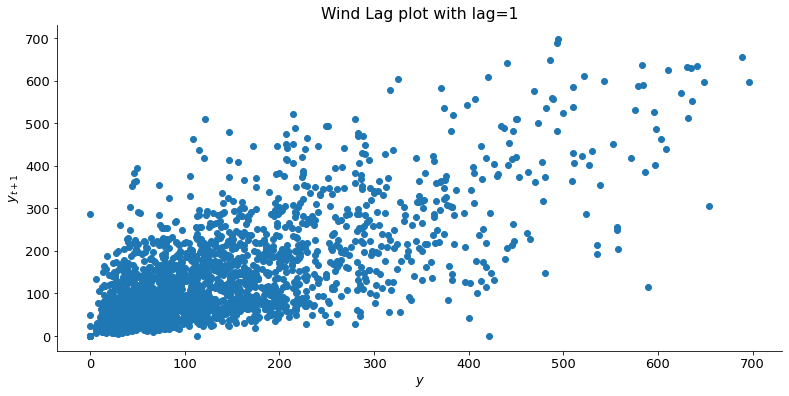

In [68]:
y = train.Wind
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Wind Lag plot with lag=1')
plt.show()

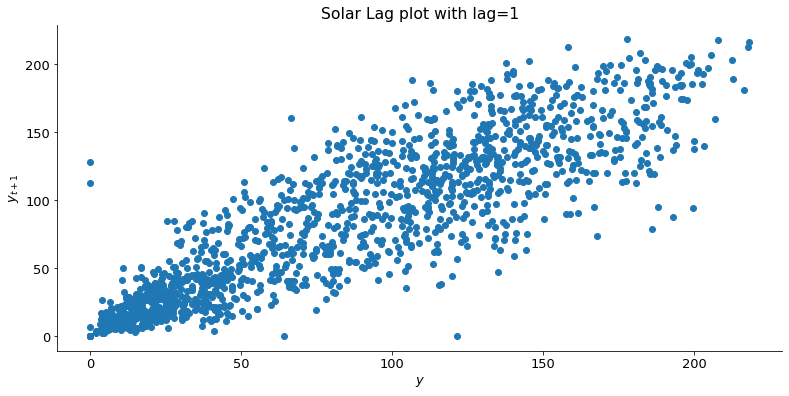

In [69]:
y = train.Solar
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Solar Lag plot with lag=1')
plt.show()

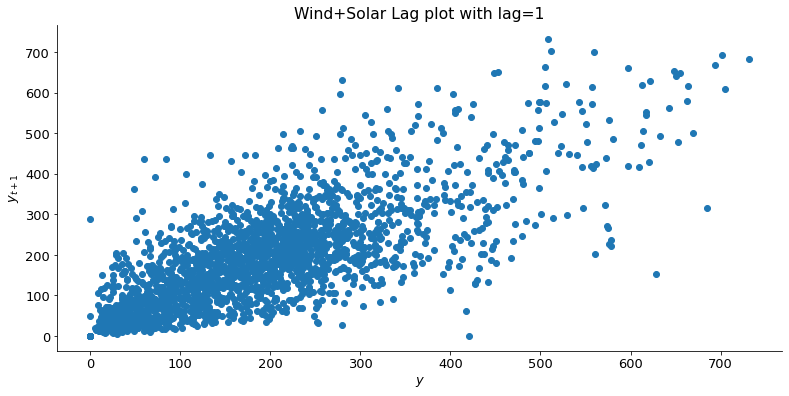

In [70]:
y = train['Wind+Solar']
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Wind+Solar Lag plot with lag=1')
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

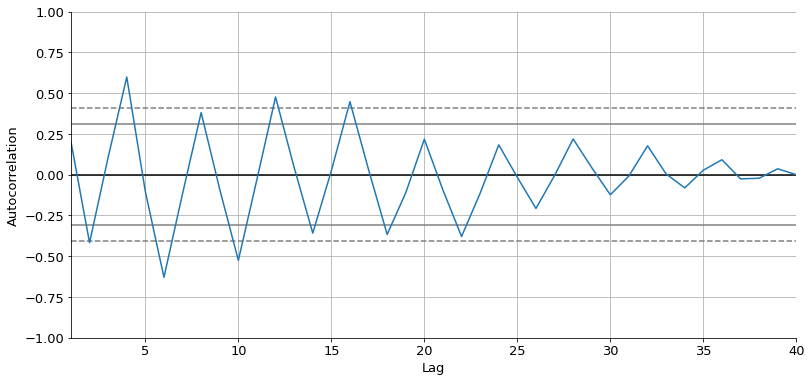

In [72]:
#Now do autocorrelation plots
y = train.Consumption
pd.plotting.autocorrelation_plot(y.resample('Q').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

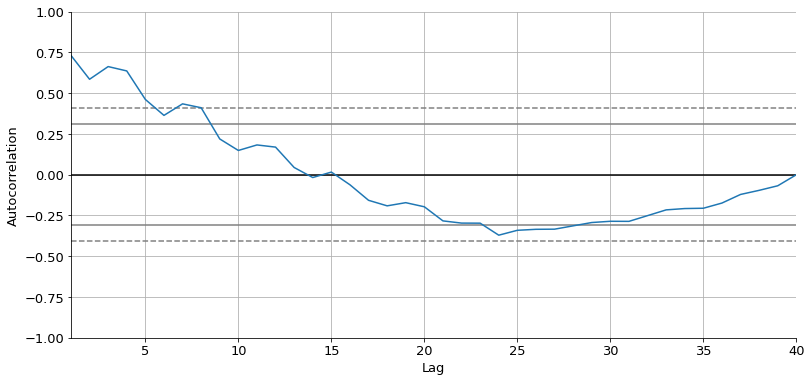

In [73]:
y = train.Wind
pd.plotting.autocorrelation_plot(y.resample('Q').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

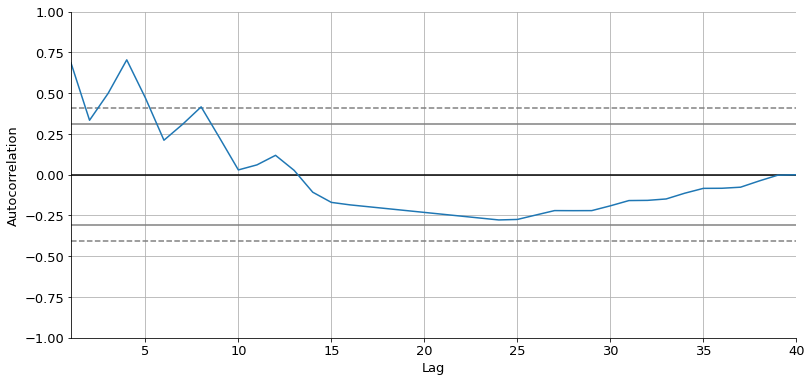

In [76]:
y = train.Solar
pd.plotting.autocorrelation_plot(y.resample('Q').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

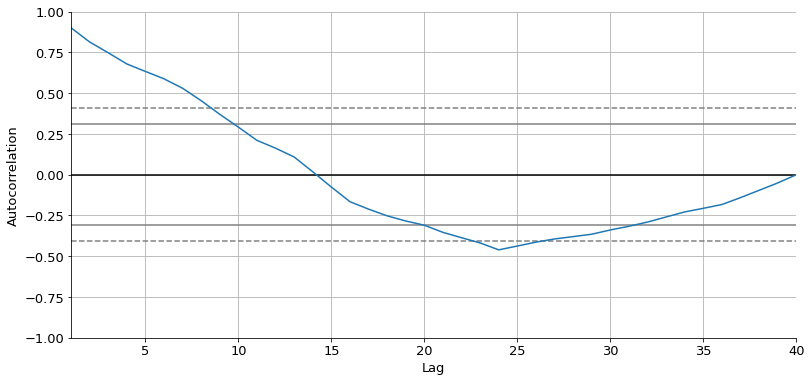

In [77]:
y = train['Wind+Solar']
pd.plotting.autocorrelation_plot(y.resample('Q').mean())